## ANALYSIS OF HOUSE SALES IN KING COUNTY USING REGRESSION MODELLING

## 1 Business Understanding

 For this project, I will use regression modeling to analyze house sales in a northwestern county.

###  1.1 Data used

## 2.  BUSINESS PROBLEM

A real estate agency project that helps homeowners buy and/or sell homes. This project focuses on the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

Analyse which factors lead to higher prices.

## 3. DATA INSPECTION

### 3.1 Importing The Necessary Libraries

In [1]:
#importing libraries and packages
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

### 3.2 Reading the kc_house_data csv file

In [2]:
# read the kc_house_data.csv file
# display the first 10 rows using .head method
king_county_df = pd.read_csv("data/kc_house_data.csv")
king_county_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


### 3.3 Inspecting the data

In [3]:
# printing information about the dataframe
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#statistical summary
king_county_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#sort the dataframe according to price
king_county_df.sort_values("price")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15279,40000362,5/6/2014,78000.0,2,1.00,780,16344,1.0,0.0,0.0,...,5,780,0.0,1942,NaN,98168,47.4739,-122.280,1700,10387
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,NaN,0.0,...,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,NaN,0.0,...,5,730,0.0,1943,0.0,98168,47.4808,-122.315,860,9000
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0.0,0.0,...,6,860,0.0,1954,0.0,98146,47.4987,-122.341,1140,11250
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0.0,0.0,...,5,520,0.0,1951,0.0,98168,47.4799,-122.296,1572,10570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449


In [6]:
#sort the dataframe according to price in descending order
king_county_df.sort_values("price", ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750


In [7]:
#check the value count of each column
for column in king_county_df:
    print(king_county_df[column].value_counts())


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
            ... 
7/27/2014      1
1/10/2015      1
1/31/2015      1
5/15/2015      1
8/3/2014       1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

## 4. DATA CLEANING

### 4.1Ensuring that each column has the correct data type

From the .info() results we can see that sqft_basement column is in the datatype object.

In [8]:
king_county_df["sqft_basement"].dtype

dtype('O')

In [9]:
#inspecting the unique values in that column
king_county_df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [10]:
king_county_df["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3500.0        1
2180.0        1
792.0         1
2240.0        1
243.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [11]:
#Replace a single value with a new value for an individual DataFrame column
king_county_df["sqft_basement"] = king_county_df["sqft_basement"].replace(['?'],'0.0')

In [12]:
#converting the sqft_basment column from str to float
king_county_df["sqft_basement"] = king_county_df["sqft_basement"].astype("float")

In [13]:
#converting the zipcode column from int to str
king_county_df["zipcode"] = king_county_df["zipcode"].astype("str")

In [14]:
#Check for column datatypes
king_county_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 4.2 Checking and Removing Null values

In [15]:
#finding the sum of null values in each column
king_county_df.isna().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [16]:
# calculating column wise Null percentage
king_county_df.isna().sum()/len(king_county_df)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

#### view column

In [17]:
#check for the summary statistics for the data
king_county_df["view"].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [18]:
#calculate the median
view_median= king_county_df["view"].median()
view_median

0.0

In [19]:
#since the median value of the view column is zero we then replace the null values with zero
king_county_df["view"].fillna(view_median,inplace =True)

#### waterfront column

In [20]:
#check for the summary statistics for the data
king_county_df["waterfront"].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [21]:
#calculate the median of waterfront
waterfront_median= king_county_df["waterfront"].median()
waterfront_median

0.0

In [22]:
#fill the null values in the waterfront column with the median of the column
king_county_df["waterfront"].fillna(waterfront_median,inplace =True)

#### Year renovated column

In [23]:
#check for value counts
king_county_df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
#calculate the median of waterfront
yr_renovated_median= king_county_df["yr_renovated"].median()
yr_renovated_median

0.0

In [25]:
#fill the null values in the yr_renovated column with the median of the column
king_county_df["yr_renovated"].fillna(yr_renovated_median,inplace =True)

In [26]:
#final check for null values in the dataset
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 4.3 Check for duplicates in the data

In [27]:
#identify duplicate rows
duplicateRows = king_county_df[king_county_df.duplicated()]
duplicateRows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


## 5. EXPLORATORY DATA ANALYSIS

#### Mapping price to see which areas have high priced houses and which do not.

Text(0.5, 1.0, 'HOUSE PRICE MAP')

<Figure size 1152x1440 with 0 Axes>

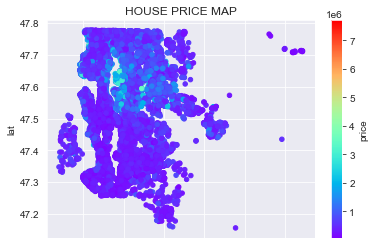

In [28]:
#scatter plot using lat and long columns
sns.set_style('darkgrid')

plt.figure(figsize=(16,20))
king_county_df.plot(kind="scatter",x = "long", y = "lat",c="price",cmap=plt.get_cmap("rainbow"))
# set the title
plt.title('HOUSE PRICE MAP')

#### convert the date to two columns year and month

In [29]:
#change the data type
king_county_df['date'] = pd.to_datetime(king_county_df['date'])

In [30]:
#divide the date column into month and year
king_county_df['year'] = king_county_df['date'].apply(lambda x: x.year)
king_county_df['month_sold'] = king_county_df['date'].apply(lambda x: x.month)
king_county_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,2
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,6
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,1


#### convert the yr_renovated to categorical variable.

In [81]:
#a fucntion for converting yr_renovated to categorical data o for not renovated and 1 for renovated
def convert_yr (e):
    if e > 0:
        return 1
    else:
        return 0
    return x


In [82]:
#apply the function to the column
king_county_df['yr_renovated'].apply(convert_yr )

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated, Length: 21595, dtype: int64

In [83]:
# make a column showing renovated category
king_county_df['renovated']=king_county_df['yr_renovated'].apply(convert_yr)
king_county_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,2014,5,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,2015,2,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,2014,6,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,2015,1,0


### 5.1 UNIVARIATE ANALYSIS

The term univariate analysis refers to the analysis of one variable.The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### price distribution

Text(0.5, 1.0, 'Price distribution')

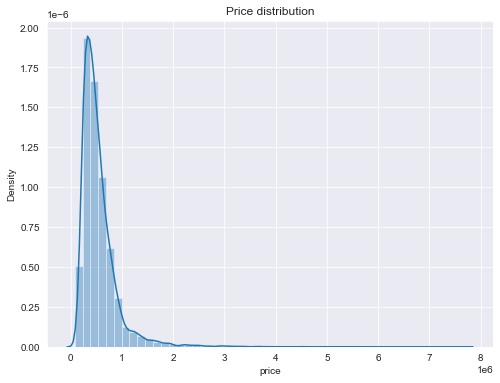

In [34]:
#plot the distribution of price.
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
dist=sns.distplot(king_county_df["price"])
dist.set_title("Price distribution")


Text(0.5, 1.0, 'Normalized house prices distribution')

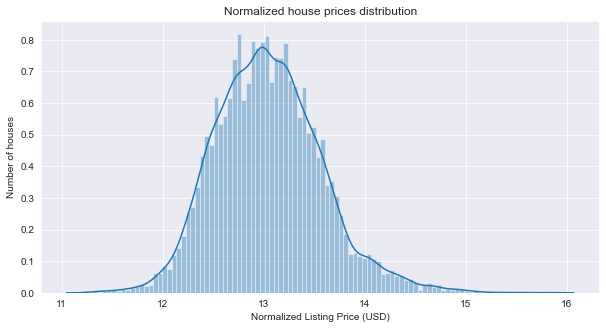

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(np.log(king_county_df['price']), bins = 100) 

ax.set_xlabel("Normalized Listing Price (USD)")
ax.set_ylabel("Number of houses")
ax.set_title("Normalized house prices distribution")

#### Distribution of all categorical variables

In [36]:
# assign categorical variables to a variable called categorical_feature
categorical_feature = [king_county_df['bedrooms'], king_county_df['view'], king_county_df['floors'], king_county_df['grade'],king_county_df['condition'],king_county_df['renovated']]

In [37]:
enumerate(categorical_feature)

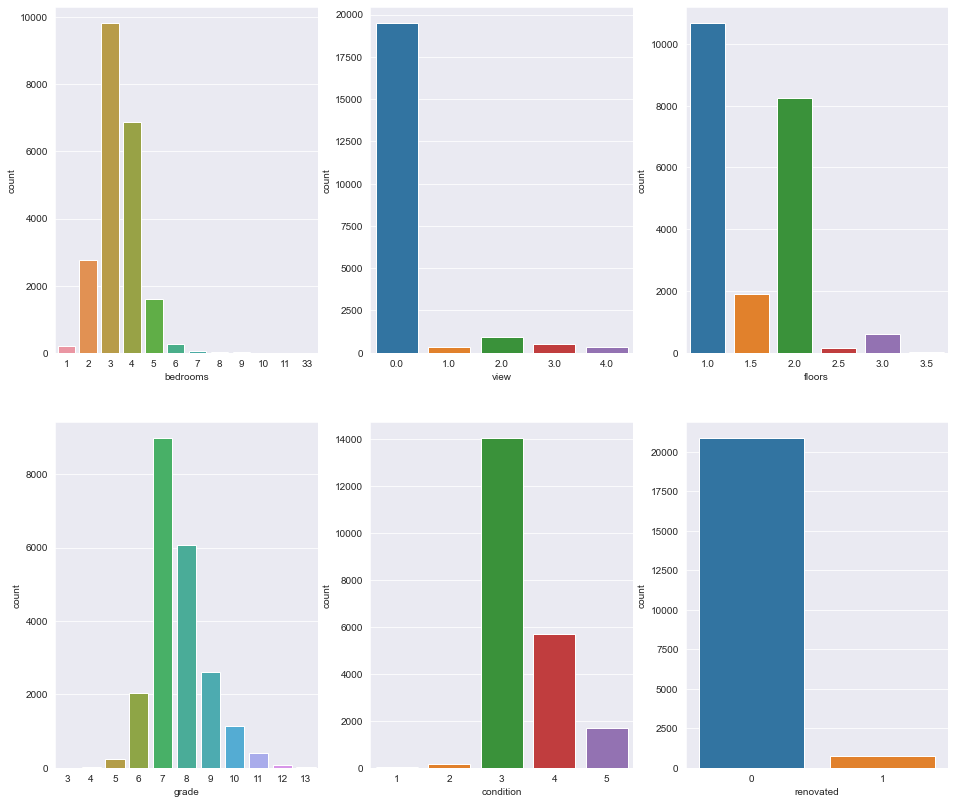

In [38]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(categorical_feature):
    plt.subplot(2,3,i[0]+1)
    sns.countplot(i[1])

#### Distribution of all numerical variables

In [39]:
# assign categorical variables to a variable called categorical_feature
numerical_feature = [king_county_df['price'], king_county_df['sqft_living'], king_county_df['sqft_lot'], king_county_df['sqft_above'],king_county_df['sqft_basement']]

In [40]:
enumerate(numerical_feature)

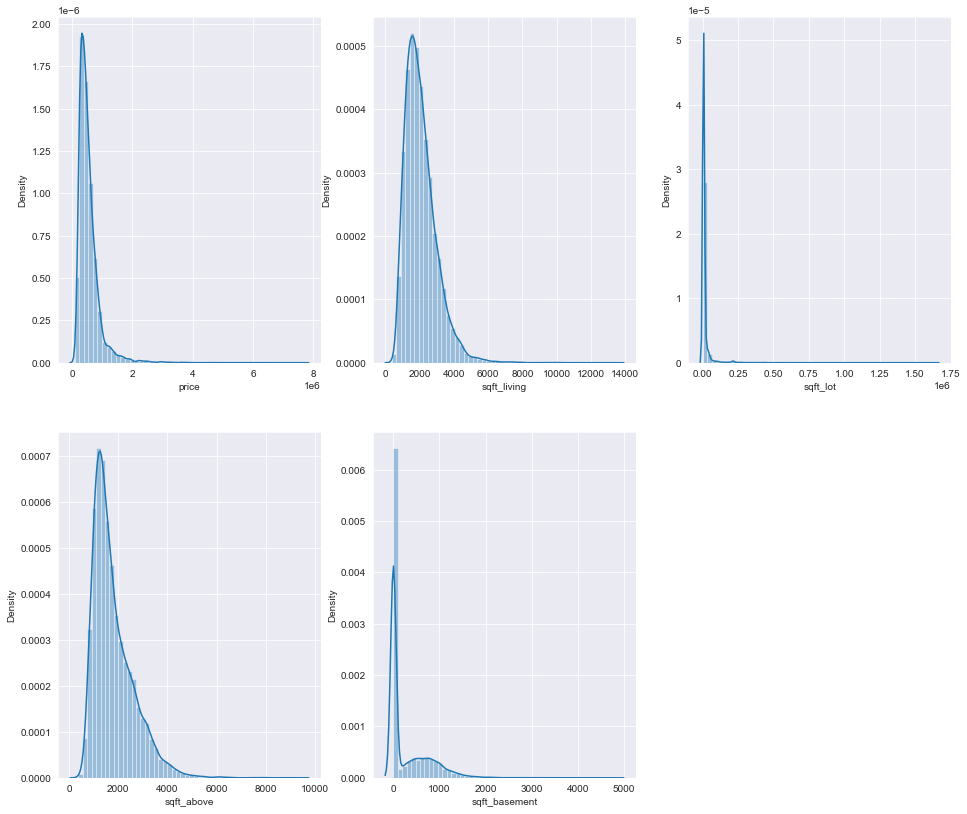

In [41]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(numerical_feature):
    plt.subplot(2,3,i[0]+1)
    sns.distplot(i[1])

### 5.2 BIVARIATE ANALYSIS

Bivariate analysis is an analysis of two variables to determine the relationships between them.

#### Correlation between price and categorical variables

In [42]:
# assign categorical variables to a variable called categorical_feature
categorical_feature = [king_county_df['bedrooms'], king_county_df['view'], king_county_df['floors'], king_county_df['grade'],king_county_df['condition'],king_county_df['renovated']]

In [43]:
enumerate(categorical_feature)

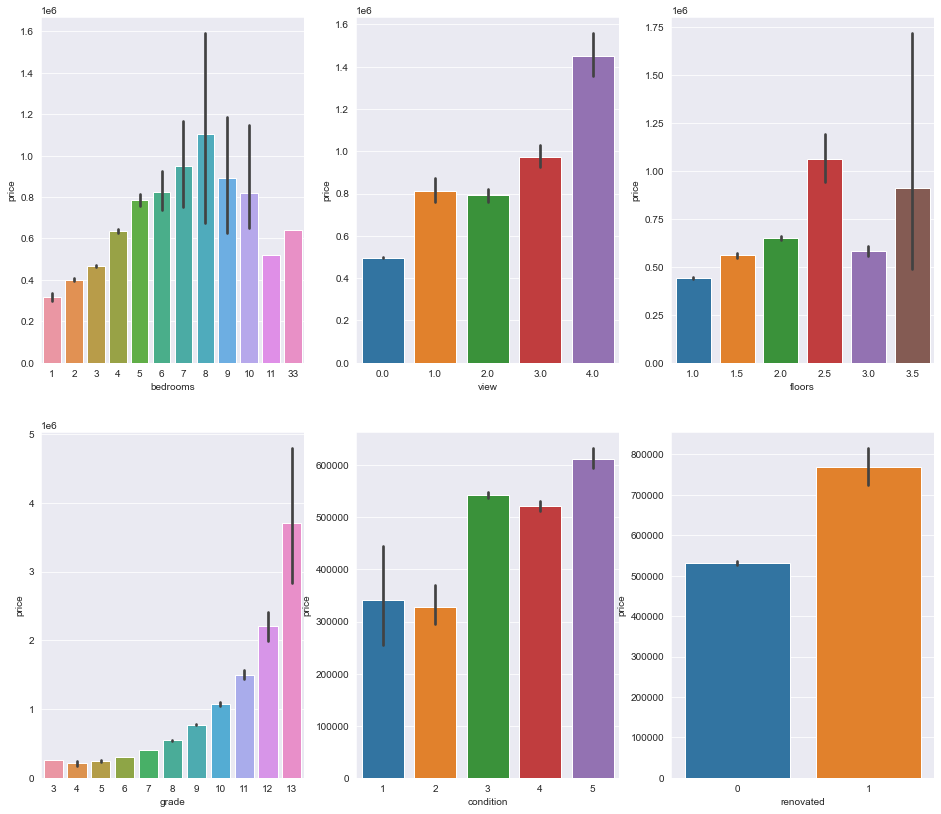

In [44]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(categorical_feature):
    plt.subplot(2,3,i[0]+1)
    sns.barplot(x=i[1],y=king_county_df['price'])

The condition of the houses are done using the [kc_county_data](https://kingcounty.gov/depts/assessor/Reports/area-reports/2016/~/media/depts/Assessor/documents/AreaReports/2016/Residential/034.ashx) on page 6 of the document.<br>
The condition of the houses are as follows:<br>
`1` = Poor Many repairs needed. Showing serious deterioration.<br>
`2` = Fair Some repairs needed immediately. Much deferred maintenance.<br>
`3` = Average Depending upon age of improvement; normal amount of upkeep for the age
of the home.<br>
`4` = Good Condition above the norm for the age of the home. Indicates extra attention
and care has been taken to maintain.<br>
`5` = Very Good Excellent maintenance and updating on home. Not a total renovation.<br>

The grade of the houses are done using the [kc_county_data](https://kingcounty.gov/depts/assessor/Reports/area-reports/2016/~/media/depts/Assessor/documents/AreaReports/2016/Residential/034.ashx) on page 6 of the document.<br>
The grade of the houses are as follows:<br>

`Grades 1` - 3 Falls short of minimum building standards. Normally cabin or inferior structure.<br>
`Grade 4` - Generally older low quality construction. Does not meet code.<br>
`Grade 5` - Lower construction costs and workmanship. Small, simple design.<br>
`Grade 6`  -Lowest grade currently meeting building codes. Low quality materials, simple designs.<br>
`Grade 7`  -Average grade of construction and design. Commonly seen in plats and older subdivisions.<br>
`Grade 8`  -Just above average in construction and design. Usually better materials in both the exterior and   interior finishes.<br>
`Grade 9` -Better architectural design, with extra exterior and interior design and quality.<br>
`Grade 10` -Homes of this quality generally have high quality features. Finish work is better,
           and more design quality is seen in the floor plans and larger square footage.<br>
`Grade 11` -Custom design and higher quality finish work, with added amenities of solid
           woods, bathroom fixtures and more luxurious options.<br>
`Grade 12` -Custom design and excellent builders. All materials are of the highest quality
           and all conveniences are present.<br>
`Grade 13` -Generally custom designed and built. Approaching the Mansion level. Large
            amount of highest quality cabinet work, wood trim and marble; large entries.<br>

#### Relationship between price and continuous variables

In [45]:
continuous_feature = [king_county_df['sqft_living'], king_county_df['sqft_lot'], king_county_df['sqft_above'],king_county_df['sqft_basement']]

In [46]:
enumerate(continuous_feature)

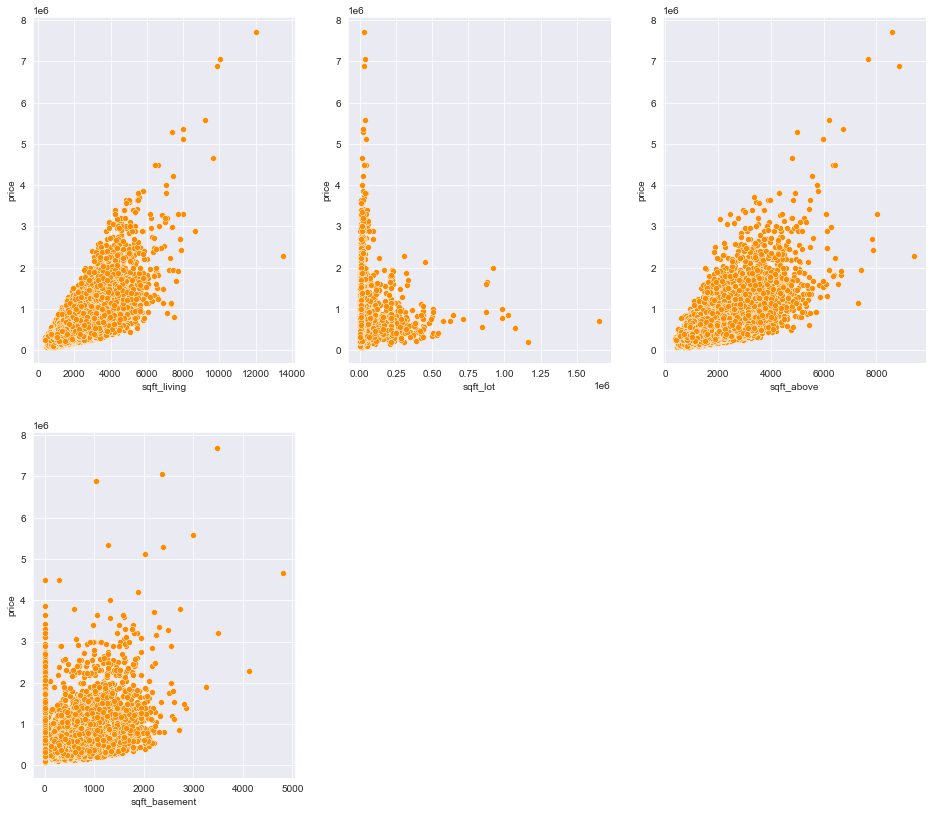

In [47]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(continuous_feature):
    plt.subplot(2,3,i[0]+1)
    sns.scatterplot(i[1],king_county_df['price'],color='darkorange')

#### Distribution of house prices overtime

In [48]:
timeseries_feature = [king_county_df['yr_built'],king_county_df['month_sold'], king_county_df['year']]

In [49]:
enumerate(timeseries_feature)

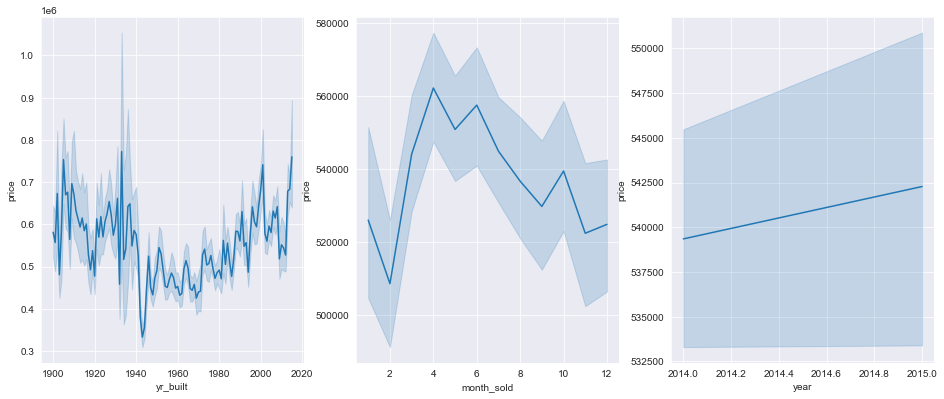

In [50]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(timeseries_feature):
    plt.subplot(2,3,i[0]+1)
    sns.lineplot(i[1],king_county_df['price'])

In [51]:
king_county_df['year'].unique()


array([2014, 2015], dtype=int64)

In [52]:
king_county_df['month_sold'].value_counts()

5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: month_sold, dtype: int64

<AxesSubplot:xlabel='month_sold', ylabel='count'>

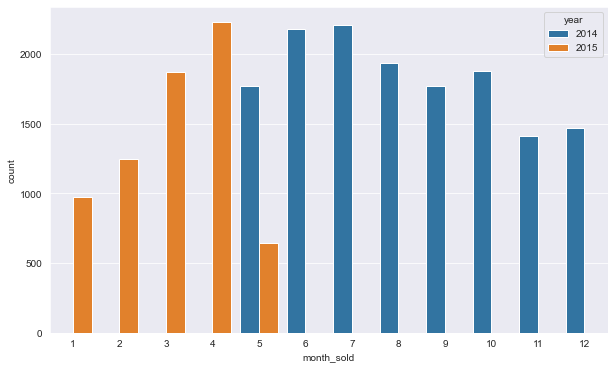

In [53]:
#more analysis on year and months
#check which month and year the houses sold the most
plt.figure(figsize=(10,6))
data = king_county_df[['month_sold', 'year']]
sns.countplot(king_county_df['month_sold'], hue = "year",data = data)

### 5.2 check for Outliers

Outliers cause various problems during our statistical Analysis.
They also cause significant impact on the mean and the standard deviation

In [54]:
#quick scan for outliers
king_county_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,...,285.716581,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512,2014.322962,6.573969,0.034449
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,...,439.819830,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950,0.467619,3.115061,0.182384
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,550.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,1.000000


In [55]:
king_county_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [56]:
most_bedroom_houses =king_county_df.sort_values(by="bedrooms", ascending=False ).head(10)
most_bedroom_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,1947,0.0,98103,47.6878,-122.331,1330,4700,2014,6,0
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,1918,1999.0,98106,47.5560,-122.363,1420,4960,2014,8,1
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,2008,0.0,98004,47.5861,-122.113,2730,10400,2014,8,0
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,1913,0.0,98105,47.6635,-122.320,1810,3745,2014,12,0
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,1958,0.0,98006,47.5705,-122.175,2040,11914,2014,10,0
6073,9822700190,2014-08-08,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,1915,2010.0,98105,47.6604,-122.289,2510,5000,2014,8,1
4231,2902200015,2015-01-06,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,1908,0.0,98102,47.6374,-122.324,1960,2450,2015,1,0
16830,8823900290,2015-03-17,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,1915,0.0,98105,47.6684,-122.309,2710,4320,2015,3,0
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,1996,0.0,98144,47.5923,-122.301,1448,3866,2014,8,0
4092,1997200215,2014-05-07,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,1938,0.0,98103,47.6927,-122.338,1460,6291,2014,5,0


In [57]:
#dropping those rows with more than 10 bedrooms
king_county_df = king_county_df[king_county_df.bedrooms <= 10]


In [58]:
most_bedroom_houses =king_county_df.sort_values(by="bedrooms", ascending=False ).head(10)
most_bedroom_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,2008,0.0,98004,47.5861,-122.113,2730,10400,2014,8,0
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,1913,0.0,98105,47.6635,-122.320,1810,3745,2014,12,0
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,1958,0.0,98006,47.5705,-122.175,2040,11914,2014,10,0
6073,9822700190,2014-08-08,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,1915,2010.0,98105,47.6604,-122.289,2510,5000,2014,8,1
4231,2902200015,2015-01-06,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,1908,0.0,98102,47.6374,-122.324,1960,2450,2015,1,0
4092,1997200215,2014-05-07,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,1938,0.0,98103,47.6927,-122.338,1460,6291,2014,5,0
18428,8823901445,2015-03-13,934000.0,9,3.00,2820,4480,2.0,0.0,0.0,...,1918,0.0,98105,47.6654,-122.307,2460,4400,2015,3,0
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,1996,0.0,98144,47.5923,-122.301,1448,3866,2014,8,0
16830,8823900290,2015-03-17,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,1915,0.0,98105,47.6684,-122.309,2710,4320,2015,3,0
17221,1338600225,2014-05-28,1970000.0,8,3.50,4440,6480,2.0,0.0,3.0,...,1959,0.0,98112,47.6310,-122.303,4440,8640,2014,5,0


#### Dealing with outliers

In [59]:
all_columns = [king_county_df['bedrooms'],king_county_df['bathrooms'], king_county_df['sqft_living'],king_county_df['sqft_lot'],king_county_df['floors'],king_county_df['waterfront'],king_county_df['view'],king_county_df['condition'],king_county_df['sqft_above'],king_county_df['grade'],king_county_df['sqft_basement'],king_county_df['sqft_living15'],king_county_df['sqft_lot15'],king_county_df['price']]

In [60]:
enumerate(all_columns)

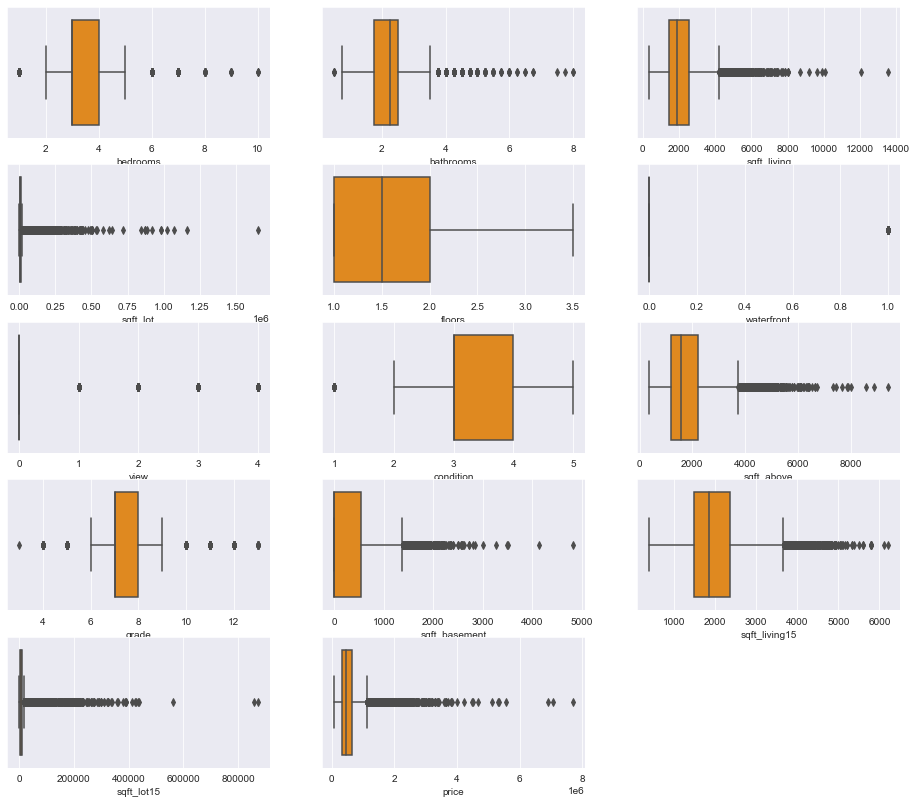

In [61]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(all_columns):
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(i[1],color='darkorange')

In [62]:
# define a function called "plot_boxplot"
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

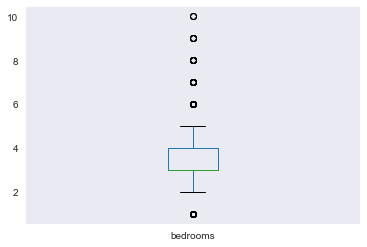

In [63]:
#call the function to plot outliers
plot_boxplot(king_county_df,'bedrooms',)

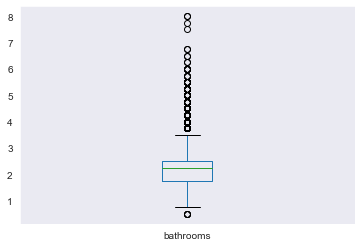

In [64]:
plot_boxplot(king_county_df,'bathrooms',)

#### removing outliers

In [65]:
# define a function called outliers which returns a list of index of outliers
# IQR =Q3 -Q1
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [66]:
# create an empty list to store the output indices from multiple columns 
index_list =[]
for element in ['price']:
    index_list.extend(outliers(king_county_df,element))

In [67]:
index_list

[5,
 21,
 49,
 69,
 125,
 153,
 216,
 246,
 269,
 270,
 282,
 300,
 312,
 313,
 314,
 384,
 419,
 427,
 450,
 472,
 473,
 484,
 489,
 503,
 509,
 518,
 527,
 540,
 551,
 556,
 599,
 656,
 669,
 679,
 691,
 722,
 738,
 757,
 779,
 792,
 801,
 814,
 884,
 934,
 946,
 1030,
 1071,
 1099,
 1105,
 1122,
 1132,
 1150,
 1159,
 1162,
 1169,
 1215,
 1245,
 1270,
 1280,
 1313,
 1326,
 1359,
 1372,
 1415,
 1418,
 1421,
 1431,
 1438,
 1442,
 1446,
 1469,
 1496,
 1528,
 1537,
 1581,
 1582,
 1584,
 1625,
 1674,
 1679,
 1704,
 1728,
 1730,
 1766,
 1768,
 1801,
 1815,
 1816,
 1833,
 1846,
 1880,
 1892,
 1933,
 1942,
 1943,
 1985,
 2021,
 2038,
 2044,
 2073,
 2082,
 2083,
 2086,
 2110,
 2123,
 2134,
 2138,
 2177,
 2179,
 2198,
 2234,
 2252,
 2265,
 2306,
 2312,
 2318,
 2337,
 2353,
 2397,
 2427,
 2442,
 2444,
 2447,
 2453,
 2459,
 2464,
 2471,
 2475,
 2514,
 2561,
 2562,
 2563,
 2576,
 2616,
 2618,
 2624,
 2639,
 2666,
 2738,
 2779,
 2788,
 2792,
 2816,
 2834,
 2843,
 2856,
 2862,
 2894,
 2897,
 2918,


In [68]:
# define a function called "remove" which returns a cleaned dataframe
def remove (df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [69]:
clean_kc_df =remove(king_county_df, index_list)


In [70]:
clean_kc_df .shape

(20437, 24)

In [71]:
# the percentage of data removed 
((len(king_county_df )-len(clean_kc_df))/len(clean_kc_df))*100

5.666193668346626

## Multicollinearity

### 5.3 Using heatmap to  see correlation of each feature to house prices

In [72]:
#peasons correlation coefficients
king_county_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
id,1.000000,-0.016765,0.002714,0.005197,-0.012214,-0.131934,0.018619,-0.003606,0.011748,-0.023750,...,-0.004304,0.021510,-0.010386,-0.001767,0.020596,-0.002772,-0.138586,0.009860,-0.011558,-0.010396
price,-0.016765,1.000000,0.316504,0.525934,0.701948,0.089879,0.256828,0.264308,0.393502,0.036029,...,0.321109,0.053964,0.117948,0.306687,0.022045,0.585274,0.082848,0.003734,-0.009925,0.117636
bedrooms,0.002714,0.316504,1.000000,0.528308,0.593780,0.033753,0.183648,-0.002026,0.080994,0.023726,...,0.303743,0.161719,0.016592,-0.011602,0.137205,0.405530,0.032057,-0.008891,-0.000973,0.016323
bathrooms,0.005197,0.525934,0.528308,1.000000,0.755742,0.088384,0.502550,0.063634,0.186033,-0.126415,...,0.278478,0.507315,0.046923,0.024303,0.224958,0.569948,0.088315,-0.026557,0.007515,0.046488
sqft_living,-0.012214,0.701948,0.593780,0.755742,1.000000,0.173465,0.353913,0.104642,0.281731,-0.059369,...,0.428665,0.318255,0.050844,0.052181,0.241261,0.756468,0.184355,-0.029000,0.012087,0.050614
sqft_lot,-0.131934,0.089879,0.033753,0.088384,0.173465,1.000000,-0.004813,0.021457,0.075048,-0.008813,...,0.015046,0.052922,0.005041,-0.085507,0.230216,0.144749,0.718202,0.005613,-0.002587,0.005152
floors,0.018619,0.256828,0.183648,0.502550,0.353913,-0.004813,1.000000,0.020798,0.028415,-0.263994,...,-0.241884,0.489300,0.003558,0.049282,0.125964,0.280118,-0.010722,-0.022353,0.014218,0.003477
waterfront,-0.003606,0.264308,-0.002026,0.063634,0.104642,0.021457,0.020798,1.000000,0.380543,0.016657,...,0.083057,-0.024500,0.074007,-0.012154,-0.037637,0.083820,0.030656,-0.005023,0.008201,0.074335
view,0.011748,0.393502,0.080994,0.186033,0.281731,0.075048,0.028415,0.380543,1.000000,0.045655,...,0.270655,-0.054494,0.090471,0.006333,-0.077732,0.278914,0.073076,0.001219,-0.005157,0.090611
condition,-0.023750,0.036029,0.023726,-0.126415,-0.059369,-0.008813,-0.263994,0.016657,0.045655,1.000000,...,0.168456,-0.361638,-0.055677,-0.015210,-0.105834,-0.093005,-0.003101,-0.045847,0.022426,-0.055251


In [73]:
mask =np.zeros_like(king_county_df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True

In [74]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,

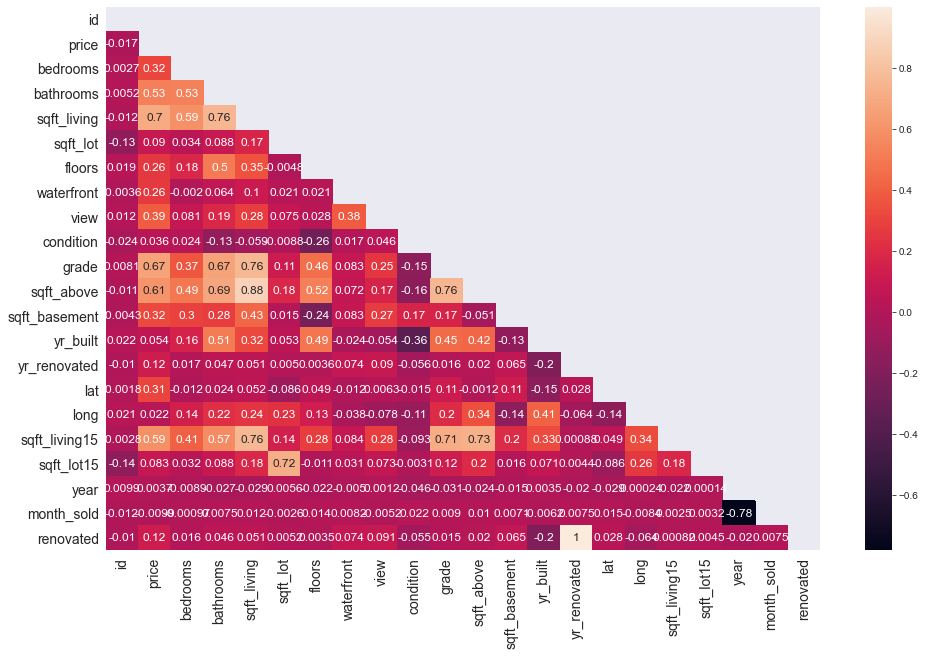

In [75]:
plt.figure(figsize=(16,10))
sns.heatmap(king_county_df.corr(), mask=mask, annot=True, annot_kws={"size":12})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Degree of correlation:

•	Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable     tends to also increase (if positive) or decrease (if negative).

•	High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

•	Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

•	Low degree: When the value lies below + .29, then it is said to be a small correlation.

•	No correlation: When the value is zero.


In [76]:
#viewing correlation in a table 
correlation= king_county_df.corr()['price'].map(abs).sort_values(ascending = False)
correlation

price            1.000000
sqft_living      0.701948
grade            0.667967
sqft_above       0.605401
sqft_living15    0.585274
bathrooms        0.525934
view             0.393502
sqft_basement    0.321109
bedrooms         0.316504
lat              0.306687
waterfront       0.264308
floors           0.256828
yr_renovated     0.117948
renovated        0.117636
sqft_lot         0.089879
sqft_lot15       0.082848
yr_built         0.053964
condition        0.036029
long             0.022045
id               0.016765
month_sold       0.009925
year             0.003734
Name: price, dtype: float64

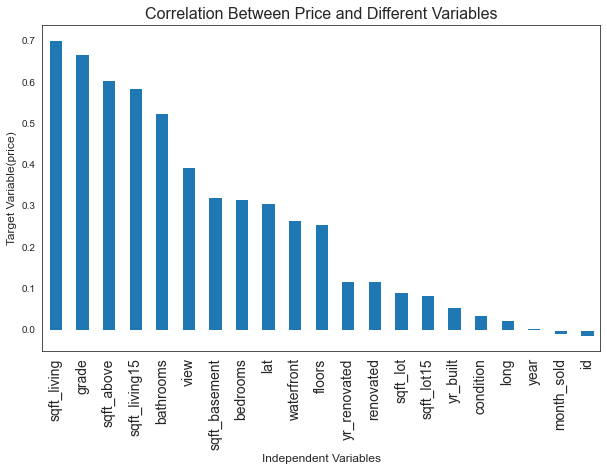

In [77]:
ax=king_county_df.corr()['price'].sort_values(ascending=False).drop('price').plot(kind='bar',figsize=(10,6))

# Set title
ax.set_title("Correlation Between Price and Different Variables",fontdict={'fontsize':16})

# Set labels for X and Y axes
ax.set_xlabel("Independent Variables",fontdict={'fontsize':12})
ax.set_ylabel("Target Variable(price)",fontdict={'fontsize':12})

ax.set_xticklabels(ax.get_xticklabels(),fontsize=14);



### 5.4 checking for Multicollinearity between different independent variables

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

In [78]:
# find variables that have a greater correlation of more than 0.75 with each other
abs(king_county_df.corr()) > 0.75 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


##### From the table above i realized that sqft_living has high coreelation with bathrooms, grade, sqft_above and sqft_living15.Also i noticed grade has high correlation with sqft_living, sqft_abbove. From this observation i think i will drop both sqft_living and grade since they might cause problems of Multicollinearity to the model.

##### since id doesn't have any correlation with house prices we drop the column. I'm also going to drop the"zip code" column, I don't think i will need it for this project. even if I fed it to our model it would be considered as a continues value although it isn't. I am going to drop date column since we already split the date into month and year sold

In [79]:
#check the columns we have
clean_kc_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month_sold',
       'renovated'],
      dtype='object')

In [80]:
p=peter

NameError: name 'peter' is not defined

In [ ]:
# dropping id,zip code, and date columns
clean_kc_df.drop(["id", "zipcode","date", "sqft_above", "sqft_basement", ""], axis = 1, inplace = True)

In [ ]:
#drop both sqft_living and grade columns to avoid problems of Multicollinearity
king_county_df.drop(['sqft_living'], axis=1, inplace=True) 
king_county_df.drop(['grade'], axis=1, inplace=True)
king_county_df

In [ ]:
clean_kc_df.head()

##  6. LINEAR REGRESSION

In [ ]:
x = king_county_df.drop(columns=['price'])
x.head()

In [ ]:
y = king_county_df['price']
y

In [ ]:
from sklearn.model_sele